<h1 style="color: #001a79;">Models: Exercise 2</h1>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Fit a straight line to the following data points, using all three methods from lecture notebook.

Do you think a straight line is a good model the x any y data-points declared below?

In [1]:
# Numerical arrays
import numpy as np

x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

In [2]:
# import all other libraries for future use...

# Optimization of cost functions
import scipy.optimize as so
import scipy.stats as ss

# for generation of qq plot
import statsmodels.api as sm
import pylab as py

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# format plots
sns.set_style("darkgrid")


<br>

<h2 style="color: #001a79;">Fitting Straight Lines</h2>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Given the cost function below for fitting straight lines, lets explore some methods available in python for estimating / calculating the best values of m and c.

$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$

### Method 1: [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

In [3]:
# analytical result
m_a, c_a = np.polyfit(x, y, 1)
m_a, c_a

(0.1031578947368421, 1.0494736842105261)

### Method 2: [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

In [4]:
def linear_cost(MC):
    '''returns the cost for passed values of m and c'''
    # Unpack m and c
    m, c = MC
    # get cost as sum of the residuals squared
    cost = np.sum((y - m * x - c) **2)
    return cost

# return minimize results by passing linear function and 2x guesses
result = so.minimize(linear_cost, (2.0, 5.0))

# pull out optimised results of slope and constant
m_o, c_o = result.x
m_o, c_o

(0.10315785976479291, 1.0494740620053158)

### Method 3: [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def f(x, m, c):
    '''returns predicted y-val given passed x, m and c vals'''
    return m * x + c

In [6]:
# Run curve_fit with default initial guesses of 1 for m and c
result = so.curve_fit(f, x, y)

# Pull out the parameters.
m_f, c_f = result[0]
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

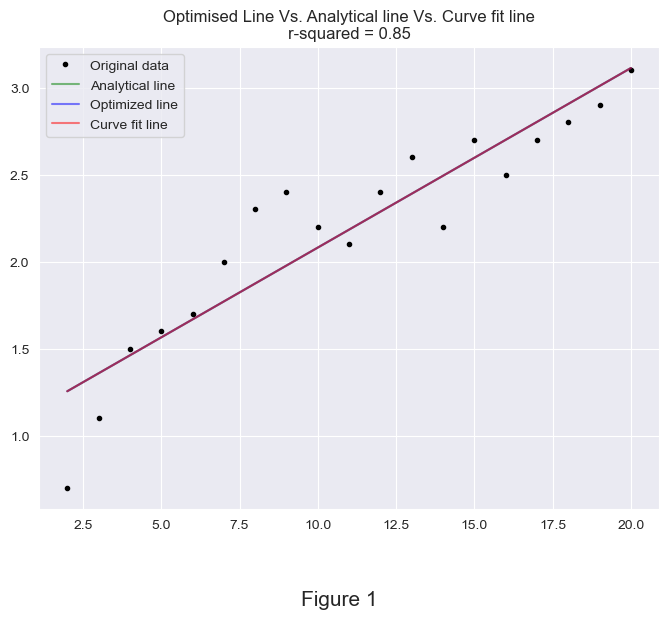

In [7]:
# Plot the best fit line from the optimization
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_a * x + c_a, 'g-', label = 'Analytical line', alpha = 0.5)
ax.plot(x, m_o * x + c_o, 'b-', label = 'Optimized line', alpha = 0.5)
ax.plot(x, m_f * x + c_f, 'r-', label = 'Curve fit line', alpha = 0.5)

# calc r-squared val
rsq = np.corrcoef(x, y)[0][1] ** 2

# format plot
plt.figtext(0.5, -0.05, 'Figure 1', wrap = True, horizontalalignment = 'center', fontsize = 15);
ax.set_title("Optimised Line Vs. Analytical line Vs. Curve fit line\n{}"
             .format('r-squared = %.2f' % (rsq)))
ax.legend()
plt.show()


<br>

<h2 style="color: #001a79;">Is the model a good fit?</h2>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Lets explore some of the assumpions that need to be considered when applying a linear regression model to our data. As detailed by Sawla (2019), there are 4 principal assumptions which justify the use of a linear regression model:
1. **Linearity:** expected value of the dependant variable is a straight line function of the dependant variable.
2. **Normality:** for any given x value the surrounding y-values should be normally distributed.
3. **Homoscedasticity:** error variance should be constant.
4. **Statistical Independence of errors:** no correlation between consecutive errors in time series data.

Given that our data is not time-series data, let's test assumptions 1, 2 and 3 above.

<br>


### 1. Linearity
***

We can see from Figure 1 above that all 3 of our straight line models somewhat fit a straight line, however there appears to be some variance between the actual values and predicted values, lets explore this variance.

In [8]:
# mean of residuals
res_mean_sq = np.sum((y - m_a * x - c_a)) / len(y)

# sum squared regression
ssr = np.sum((y - m_a * x - c_a) ** 2)

#  total sum of squares
sst = np.sum((y - np.mean(y)) ** 2)

# calc r-squared
r_sq = 1 - (ssr / sst)

print(f'mean of residuals = {res_mean_sq}')
print(f'r-squared = {r_sq:.3f}')

mean of residuals = 3.0385051200267443e-16
r-squared = 0.854


We can see that the mean of residuals is a very small value, meaning that on average there is little difference between y-actual and y-predicted using our model. Also the r-squared-value of 0.85 helps give us confidence that there is a linear correlation between the dependant and independant variable.

<br>


### 2. Normality
***

From the Shapiro test conducted we tested the null hypothesis that the residual data was drawn from a normal distribution. A p-value of 0.83 was returned which is significantly greater than 0.05 so we fail to reject the null hypothesis.


In [9]:
# get residuals into a list
residuals = [(y[i] - m_a * x[i] - c_a) for i in range(y.size)]

## code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
shapiro_test = ss.shapiro(residuals)
print(f'statistic = {shapiro_test.statistic:.3f}\np-value {shapiro_test.pvalue:.3f}')

statistic = 0.973
p-value 0.830


Lets get a visual on the residual distribution via a histogram and normality via a Quantile-Quantile (Q-Q) plot. Sawla (2019) helps describe how Q-Q plots compare the quartiles of a normal distribution vs the quartiles of the dependant variable's distribution. The histogram below shows that the data does somewhat resemble the saught after bell-curve shape, however it is hard to tell given the numbers of data points we have to work with. The Q-Q plot in Figure 2 shows the datapoints close to the red line but forming forming small repeating s-shape patterns around it. In reality our dataset is very small and one should consider the Central Limit Theorem which states that as the size of sample increases, the distribution of the samples means will tend towards that of a nomral distribution [1]. I would also be possible that this pattern of deviation from residual normality is due to some time-series event causing variance.

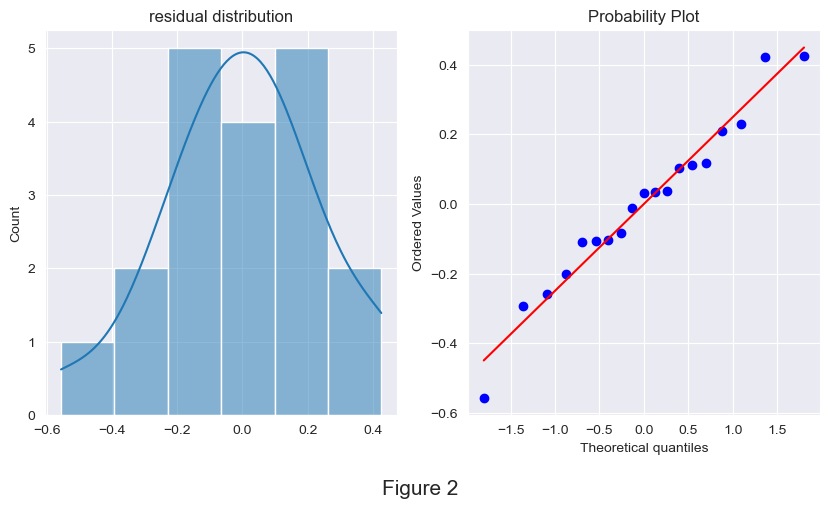

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
plt.figtext(0.5, -0.05, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15);

# plot histgram
sns.histplot(x = residuals, kde = True, ax = ax1)

# quantile-quantile (qq) plot 
# plot code adopdted from: https://www.kaggle.com/code/gadaadhaarigeek/q-q-plot
ss.probplot(residuals, dist="norm", plot = py)
ax1.set_title("residual distribution")
plt.show();

<h2 style="color: rgb(0, 91, 94);">References</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


[1]. Mittal, A, 2020, Why The Central Limit Theorem in Data Science?, towards data science, Available at: [Ref Link](https://aditi-mittal.medium.com/why-the-central-limit-theorem-in-data-science-be8997b95f3)<br>
(Accessed 04 November 2022).

<br>

[1]. Chandran, S, 2021, Significance of Q-Q Plots, towards data science, Available at: [Ref Link](https://towardsdatascience.com/significance-of-q-q-plots-6f0c6e31c626) <br>
(Accessed 03 November 2022).

<br>

[2]. Sawla, S, 2019, Linear Regression- Data Science Algorithm every Data Scientist should know, medium.com, Available at: [Ref Link](https://medium.com/@srishtisawla/linear-regression-data-science-algorithm-every-data-scientist-should-know-34d5fcb51c03) <br>(Accessed 02 November 2022).







<h2 style="color: rgb(0, 91, 94);">End</h2>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />